In [55]:
from sqlalchemy import create_engine
from tqdm import tqdm
import datetime as dt
import pandas as pd
import numpy as np
import warnings
import json
import os

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [56]:
os.chdir('../')
path = os.getcwd()

In [57]:
date_now = dt.datetime.now().date().strftime('%d.%m.%Y')

In [58]:
date_now = '04.06.2024'

# 1. Sokolov

In [91]:
df_sokolov = pd.read_csv(rf'{path}\sokolov\parsed_data\result\sokolov_all_{date_now}.csv')


In [92]:
df_sokolov['discount'].value_counts(dropna=False)

discount
Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2               3840
NaN                                                            3699
Дополнительная скидка по акции «Готовимся к лету!» ЕЩЁ -10%    2593
Дополнительная скидка по акции «Готовимся к лету!» ЕЩЁ -20%     884
Name: count, dtype: int64

In [93]:
df_sokolov.columns = ['date', 'competitor', 'name', 'group', 'weight', 'price', 'price_old',
                    'discount', 'insert', 'metal', 'lock_type_or_weaving_type', 'url']


In [94]:
df_sokolov['discount_for_dash'] = df_sokolov['discount']

In [95]:
df_sokolov

,date,competitor,name,group,weight,price,price_old,discount,insert,metal,lock_type_or_weaving_type,url,discount_for_dash
0,04-06-2024,Sokolov,Серьги из белого золота с бриллиантами и танза...,earrings,2.18 г,96750,214990,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,"Бриллиант (природный) (36 шт, 0.135 карат) и е...",Белое золото 585 пробы,Пусет,6024434-3,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2
1,04-06-2024,Sokolov,Подвеска из белого золота с бриллиантами и тан...,pendants,0.86 г,44100,97990,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,"Бриллиант (природный) (18 шт, 0.067 карат) и е...",Белое золото 585 пробы,NaN,6034150-3,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2
2,04-06-2024,Sokolov,Кольцо из белого золота с бриллиантами и танза...,rings,2.16 г,65250,144990,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,"Бриллиант (природный) (18 шт, 0.067 карат) и е...",Белое золото 585 пробы,NaN,6014351-3,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2
3,04-06-2024,Sokolov,Колье из белого золота с бриллиантами и танзан...,necklaces,2.61 г,63000,139990,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,"Бриллиант (природный) (16 шт, 0.046 карат) и е...",Белое золото 585 пробы,NaN,6074002,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2
4,04-06-2024,Sokolov,Серьги из белого золота с бриллиантами,earrings,2.03 г,51750,114990,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,"Бриллиант (природный) (12 шт, 0.102 карат) и е...",Белое золото 585 пробы,Пусет,1021708,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,04-06-2024,Sokolov,Серьги из золота с бриллиантами,earrings,1.45 г,30600,67990,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,"Бриллиант (природный) (6 шт, 0.017 карат)",Красное золото 585 пробы,Английский,1021454,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2
11012,04-06-2024,Sokolov,Серьги из золота с бриллиантами,earrings,1.42 г,28350,62990,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,"Бриллиант (природный) (2 шт, 0.016 карат) и еще 1",Красное золото 585 пробы,Английский,1021455,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2
11013,04-06-2024,Sokolov,Серьги из золота с бриллиантами,earrings,3.15 г,83250,184990,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,"Бриллиант (природный) (50 шт, 0.188 карат)",Красное золото 585 пробы,Английский,1021465,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2
11014,04-06-2024,Sokolov,Серьги из белого золота с бриллиантами,earrings,3.6 г,73500,244990,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,"Бриллиант (природный) (80 шт, 0.307 карат)",Белое золото 585 пробы,Английский,1021468,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2


In [96]:
df_sokolov['discount_for_dash'] = df_sokolov['discount_for_dash'].fillna('нет скидочного купона')

In [97]:
for i in df_sokolov.index:
    if df_sokolov['price_old'][i] == 0:
        df_sokolov['discount_for_dash'][i] = 'ШОК-ЦЕНА'

In [98]:
df_sokolov['discount'] = np.where(
    df_sokolov['discount_for_dash'].str.contains('Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2'), 0.5, df_sokolov['discount_for_dash']
)

In [99]:
df_sokolov['discount'].fillna(1, inplace=True)

In [100]:
def discount_value(discount):
    if '10%' in discount:
        return 0.9
    elif '15%' in discount:
        return 0.85
    elif '20%' in discount:
        return 0.8
    elif '25%' in discount:
        return 0.75
    elif '30%' in discount:
        return 0.7
    elif 'нет скидочного' in discount or 'ШОК' in discount:
        return 1
    return discount

In [101]:
df_sokolov['discount'] = df_sokolov['discount'].astype(str)
df_sokolov['discount'] = df_sokolov['discount'].apply(discount_value)
df_sokolov['discount'] = df_sokolov['discount'].astype(float)

In [102]:
df_sokolov['discount_for_dash'].value_counts()

discount_for_dash
Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2               3840
нет скидочного купона                                          3609
Дополнительная скидка по акции «Готовимся к лету!» ЕЩЁ -10%    2593
Дополнительная скидка по акции «Готовимся к лету!» ЕЩЁ -20%     884
ШОК-ЦЕНА                                                         90
Name: count, dtype: int64

In [103]:
df_sokolov['price_personal'] = df_sokolov['price'] * df_sokolov['discount']

In [110]:
df_sokolov

,date,competitor,name,group,weight,price,price_old,discount,insert,metal,lock_type_or_weaving_type,url,discount_for_dash,price_personal,discount_flag
0,04-06-2024,Sokolov,Серьги из белого золота с бриллиантами и танза...,earrings,2.18 г,96750,214990,0.5,"Бриллиант (природный) (36 шт, 0.135 карат) и е...",Белое золото 585 пробы,Пусет,6024434-3,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,48375.0,29025.0
1,04-06-2024,Sokolov,Подвеска из белого золота с бриллиантами и тан...,pendants,0.86 г,44100,97990,0.5,"Бриллиант (природный) (18 шт, 0.067 карат) и е...",Белое золото 585 пробы,NaN,6034150-3,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,22050.0,13230.0
2,04-06-2024,Sokolov,Кольцо из белого золота с бриллиантами и танза...,rings,2.16 г,65250,144990,0.5,"Бриллиант (природный) (18 шт, 0.067 карат) и е...",Белое золото 585 пробы,NaN,6014351-3,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,32625.0,19575.0
3,04-06-2024,Sokolov,Колье из белого золота с бриллиантами и танзан...,necklaces,2.61 г,63000,139990,0.5,"Бриллиант (природный) (16 шт, 0.046 карат) и е...",Белое золото 585 пробы,NaN,6074002,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,31500.0,18900.0
4,04-06-2024,Sokolov,Серьги из белого золота с бриллиантами,earrings,2.03 г,51750,114990,0.5,"Бриллиант (природный) (12 шт, 0.102 карат) и е...",Белое золото 585 пробы,Пусет,1021708,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,25875.0,15525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,04-06-2024,Sokolov,Серьги из золота с бриллиантами,earrings,1.45 г,30600,67990,0.5,"Бриллиант (природный) (6 шт, 0.017 карат)",Красное золото 585 пробы,Английский,1021454,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,15300.0,9180.0
11012,04-06-2024,Sokolov,Серьги из золота с бриллиантами,earrings,1.42 г,28350,62990,0.5,"Бриллиант (природный) (2 шт, 0.016 карат) и еще 1",Красное золото 585 пробы,Английский,1021455,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,14175.0,8505.0
11013,04-06-2024,Sokolov,Серьги из золота с бриллиантами,earrings,3.15 г,83250,184990,0.5,"Бриллиант (природный) (50 шт, 0.188 карат)",Красное золото 585 пробы,Английский,1021465,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,41625.0,24975.0
11014,04-06-2024,Sokolov,Серьги из белого золота с бриллиантами,earrings,3.6 г,73500,244990,0.5,"Бриллиант (природный) (80 шт, 0.307 карат)",Белое золото 585 пробы,Английский,1021468,Второе украшение с бриллиантами БЕСПЛАТНО! 1 ＝ 2,36750.0,22050.0


In [105]:
no_discount = 0
df_sokolov['discount_flag'] = np.nan
for i in df_sokolov.index:
    if df_sokolov['price_old'][i] != 0:
        df_sokolov['discount_flag'][i] = df_sokolov['price'][i] * 0.3
    else:
        df_sokolov['discount_flag'][i] = no_discount

In [109]:
df_sokolov['price_personal'] = np.nan
for i in df_sokolov.index:
    if df_sokolov['discount'][i] == 0.5:
        df_sokolov['price_personal'][i] = df_sokolov['price'][i] * 0.5
    elif df_sokolov['discount_flag'][i] <= (df_sokolov['price'][i] * 0.3):
        df_sokolov['price_personal'][i] = df_sokolov['price'][i] - df_sokolov['discount_flag'][i]
    else:
        df_sokolov['price_personal'][i] = df_sokolov['price'][i] - (df_sokolov['price'][i] * 0.3)

In [111]:
df_sokolov['price_old'] = np.where(
    df_sokolov['price_old'] == 0, df_sokolov['price'], df_sokolov['price_old']
)

In [112]:
old = df_sokolov['price_old'].describe()

In [113]:
price = df_sokolov['price'].describe()

In [114]:
result = df_sokolov['price_personal'].describe()

In [115]:
df = pd.merge(result, old, right_index = True, left_index = True).merge(price, right_index = True, left_index = True)

In [116]:
df.columns = ['Цена в корзине пользователя', 'Перечёркнутая цена', 'Цена до скидок']

In [117]:
df['Цена в корзине пользователя'] = df['Цена в корзине пользователя'].astype(int)
df['Перечёркнутая цена'] = df['Перечёркнутая цена'].astype(int)
df['Цена до скидок'] = df['Цена до скидок'].astype(int)

In [118]:
df = df[['Перечёркнутая цена', 'Цена до скидок', 'Цена в корзине пользователя']]

In [119]:
df = df.iloc[1:,:]

In [120]:
df['Дата мониторинга'] = pd.to_datetime(date_now, format = 'mixed')

In [121]:
df['competitor'] = 'Sokolov'

In [177]:
pip install brewer2mpl

Note: you may need to restart the kernel to use updated packages.


C:\Users\Trenkin.Sergey\AppData\Roaming\Python\Python312\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\Trenkin.Sergey\AppData\Roaming\Python\Python312\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\Trenkin.Sergey\AppData\Roaming\Python\Python312\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [197]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='ignore')

large = 22; med = 16; small = 12
params = {'axes.titlesize': med,
          'legend.fontsize': med,
          'figure.figsize': (8, 5),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.8.0
0.13.0


In [216]:
df = df_sokolov[['price_old', 'price', 'price_personal']]

In [217]:
df.columns = ['Перечёркнутая цена', 'Цена до скидок', 'Цена персональная']

In [205]:
import joypy

In [218]:
df = df[df['Перечёркнутая цена'] < 250000]

<Figure size 1280x800 with 0 Axes>

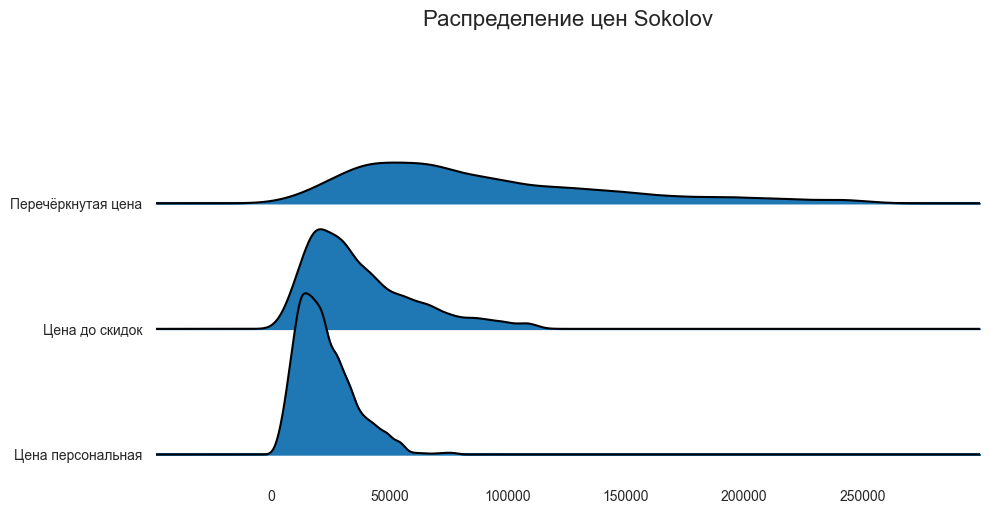

In [227]:
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(df, column=['Перечёркнутая цена', 'Цена до скидок', 'Цена персональная'], figsize=(10,5))

# Decoration
plt.title('Распределение цен Sokolov', fontsize=16)
plt.show()

<Axes: xlabel='Цена персональная', ylabel='Density'>

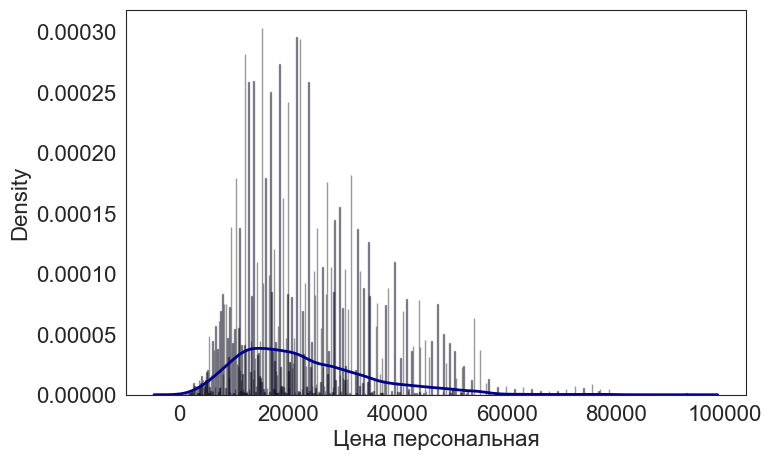

In [232]:
sns.distplot(df['Цена персональная'], hist=True, kde=True, 
            bins=df['Цена персональная'].count() // 10, color = 'darkblue', 
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth': 2})